
Generate artificial graph data set


In [13]:
import random

def gen_graph_data(num_of_class = 4, edg_in_class = 20, prob_conn_in = 70, prob_conn_out = 30 ):
    # generate adjancency list
    adjlist = []
    
    for i in range(num_of_class*edg_in_class):
        node_links = []
        
        #insert first node
        node_links.append(i)
        
        #insert neighbors of neighbours
        for j in range(num_of_class*edg_in_class):
            
            if j!=i:
                
                r = random.random()*100
                #same class
                if int(i/edg_in_class)==int(j/edg_in_class):
                    if r<=prob_conn_in:
                        node_links.append(j)
                #different class
                else:
                    if r<=prob_conn_out:
                        node_links.append(j)
        adjlist.append(node_links)
    return adjlist
    
    
    
    
adj = gen_graph_data()
#print(adj)

In [10]:
with open("file.txt", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')

In [1]:
art4_20 = 'C:/Users/Hp/Downloads/deepwalk/artificial4_20_2d.embeddings'

emb_dict = {}

with open(art4_20, 'r') as f:
    temp = f.readlines()

content = [x.strip() for x in temp] 
for row in content[1:]:
    row_t = row.split()
    emb_dict[row_t[0]]=(float(row_t[1]),float(row_t[2]))
#print(emb_dict)

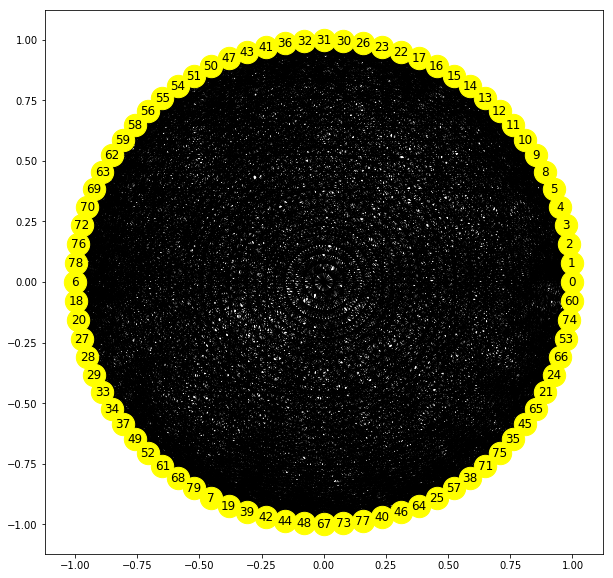

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

art_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/artificial4_20.adjlist.txt'

G=nx.read_adjlist(art_f)

plt.rcParams["figure.figsize"] = (10,10)
nx.draw_networkx(G,pos = nx.shell_layout(G),font_size=12, node_size= 500, node_color = 'yellow')
plt.show()

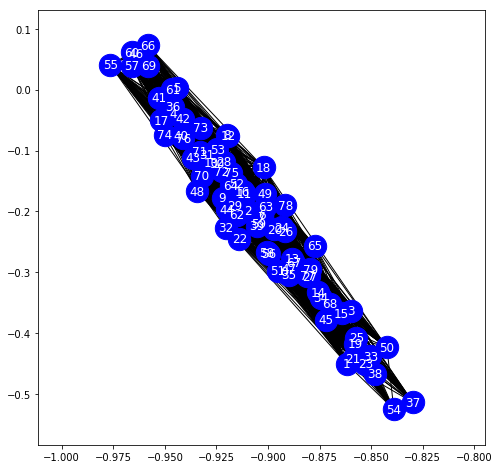

In [3]:
plt.rcParams["figure.figsize"] = (8,8)
nx.draw_networkx(G,emb_dict,font_size=12, node_size= 500, node_color = 'blue', font_color = 'white' )
#plt.savefig('res/emb2_karate.png')
plt.show()

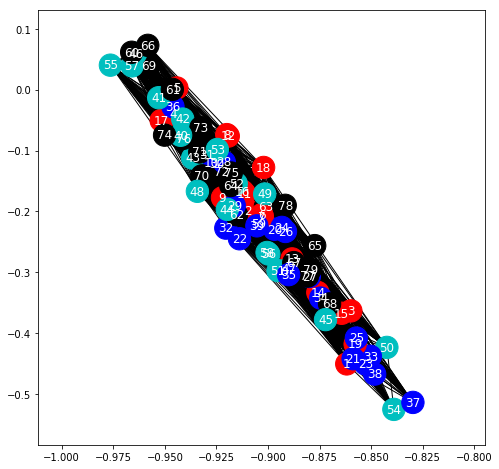

In [5]:
color_map = []
colors = ['r','b','c','k']
for node in G:
    if int(node)<20:
        color_map.append(colors[0])
    elif 20<=int(node)<40:
        color_map.append(colors[1])
    elif 40<=int(node)<60:
        color_map.append(colors[2])
    else:
        color_map.append(colors[3])
        
        
plt.rcParams["figure.figsize"] = (8,8)
nx.draw_networkx(G,emb_dict,font_size=12, node_size= 500, node_color = color_map, font_color = 'white' )
#plt.savefig('res/emb2_karate.png')
plt.show()
        

<IPython.core.display.Javascript object>


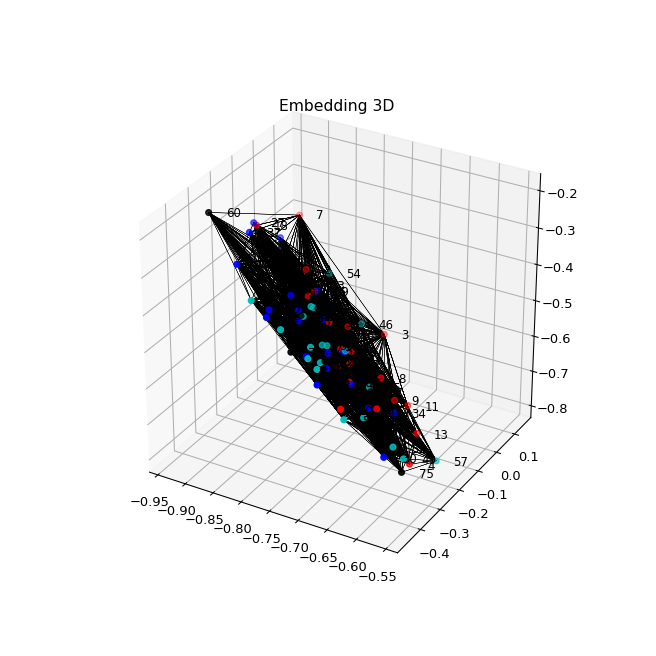

In [23]:
from mpl_toolkits.mplot3d import axes3d
def make_adj_dict(f_adjlist):
    
    adj_dict={}
    
    with open(f_adjlist, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content:
        row_t = row.split()
        #print(row.split())
        adj_dict[row_t[0]]=row_t[1:]
    
    #print(adj_dict)
    return adj_dict
def plot3d(edgelist, embedding, title='', node_color='blue', edge_color='black',linewidth=0.3):
    
    
    adj = make_adj_dict(edgelist)
    
    #data = embedding
    # read embedding and make embedding dict
    data = {}

    with open(embedding, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content[1:]:
        row_t = row.split()
        data[row_t[0]]=(float(row_t[1]),float(row_t[2]),float(row_t[3]))
    
    #print(data)
    nodes = data.keys()
    nodes = sorted(nodes, key=lambda n : int(n))
    
    fig = plt.figure(0)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotting nodes from the embedding given their coordinates
    ax.scatter(
        [data[key][0] for key in nodes], 
        [data[key][1] for key in nodes], 
        [data[key][2] for key in nodes], 
        c=node_color
    )
    # Plotting labels
    for key in nodes:
        ax.text(data[key][0]+0.03,data[key][1],data[key][2],key,fontsize=9)
    
    # Plotting edges between adjacent nodes
    for node in adj:
        neighbors = adj[node]
        
        X, Y, Z = [data[node][0]], [data[node][1]], [data[node][2]]
        
        for neighbor in neighbors:
            X.append(data[neighbor][0])
            X.append(data[node][0])
            
            Y.append(data[neighbor][1])
            Y.append(data[node][1])
            
            Z.append(data[neighbor][2])
            Z.append(data[node][2])
        
        ax.plot(X, Y, Z, color=edge_color,linewidth=linewidth)
        
    
    plt.title(title)

color_map=[]

for node in range(80):
    if node<20:
        color_map.append(colors[0])
    elif 20<=node<40:
        color_map.append(colors[1])
    elif 40<=node<60:
        color_map.append(colors[2])
    else:
        color_map.append(colors[3])  
    

%matplotlib notebook
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/artificial4_20.adjlist.txt'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/artificial4_20_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',)


In [14]:
adj = gen_graph_data(prob_conn_in = 40,prob_conn_out = 5)
with open("graph40in_5out.adjlist", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')


<IPython.core.display.Javascript object>


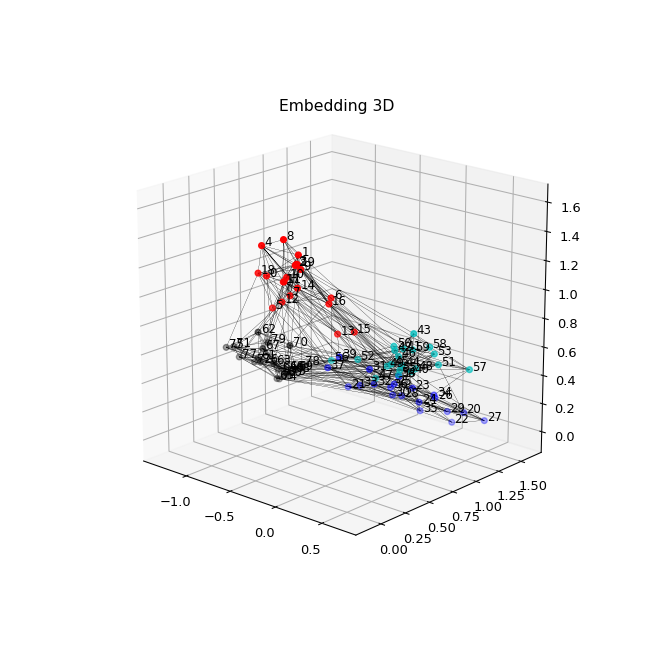

In [24]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph40in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph40in_5out_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

In [26]:
def gen_undirected_graph_data(num_of_class = 4, edg_in_class = 20, prob_conn_in = 70, prob_conn_out = 30 ):
    # generate adjancency list
    adjlist = []
    
    for i in range(num_of_class*edg_in_class):
        node_links = []
        
        #insert first node
        node_links.append(i)
        
        #insert neighbors of neighbours
        for j in range(i+1,num_of_class*edg_in_class):
                
            r = random.random()*100
            #same class
            if int(i/edg_in_class)==int(j/edg_in_class):
                if r<=prob_conn_in:
                    node_links.append(j)
            #different class
            else:
                if r<=prob_conn_out:
                    node_links.append(j)
        adjlist.append(node_links)
    return adjlist

In [27]:
adj = gen_undirected_graph_data(prob_conn_in = 40,prob_conn_out = 5)
with open("graph40in_5out.adjlist", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')

<IPython.core.display.Javascript object>


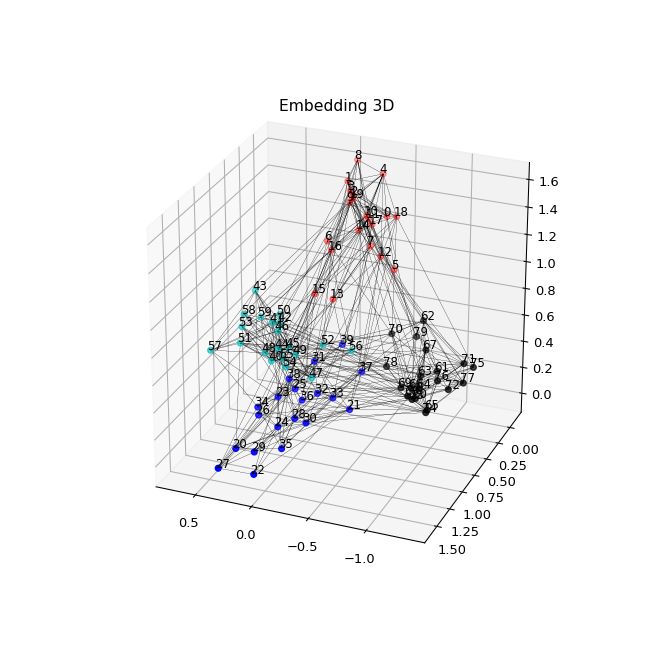

In [33]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph40in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph40in_5out_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

In [31]:
adj = gen_undirected_graph_data(prob_conn_in = 30,prob_conn_out = 5)
with open("graph30in_5out.adjlist", 'w') as target:
    for row in adj:
        line = " ".join(str(x) for x in row)
        #line.join("\n")
        target.write(line+'\n')

<IPython.core.display.Javascript object>


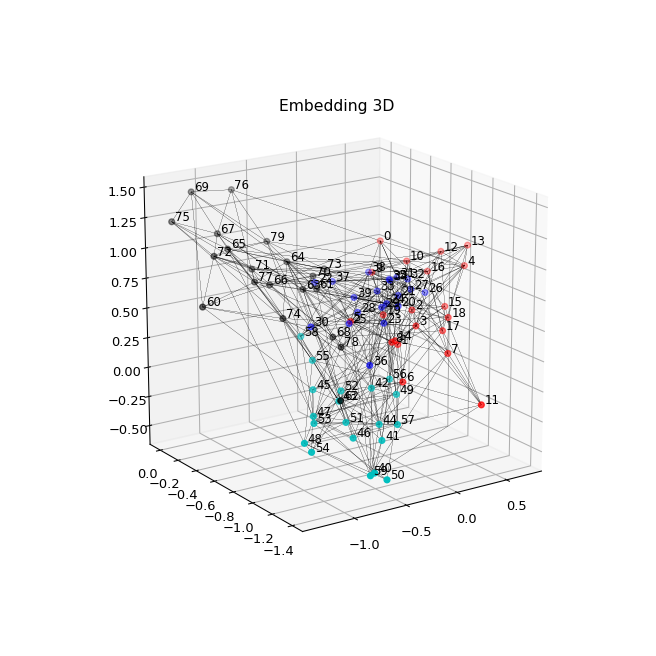

In [34]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

Embedding with number walks 15

<IPython.core.display.Javascript object>


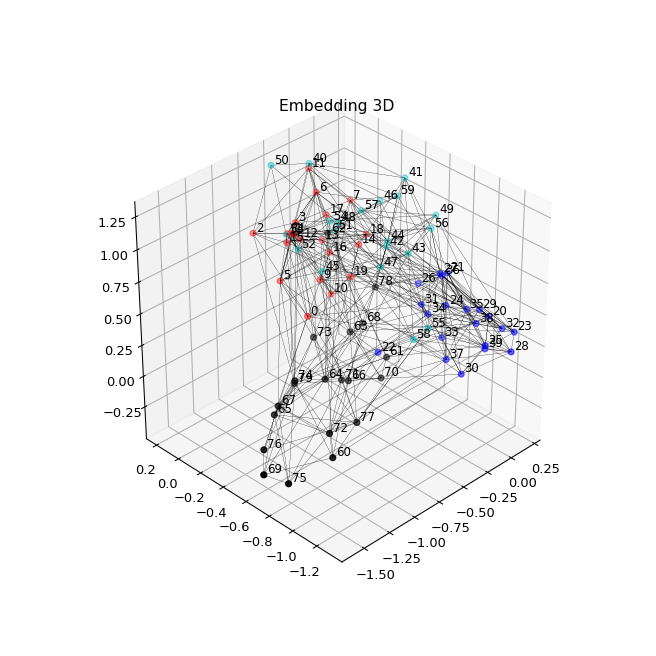

In [35]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw15.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

Embedding with number walks 20

<IPython.core.display.Javascript object>


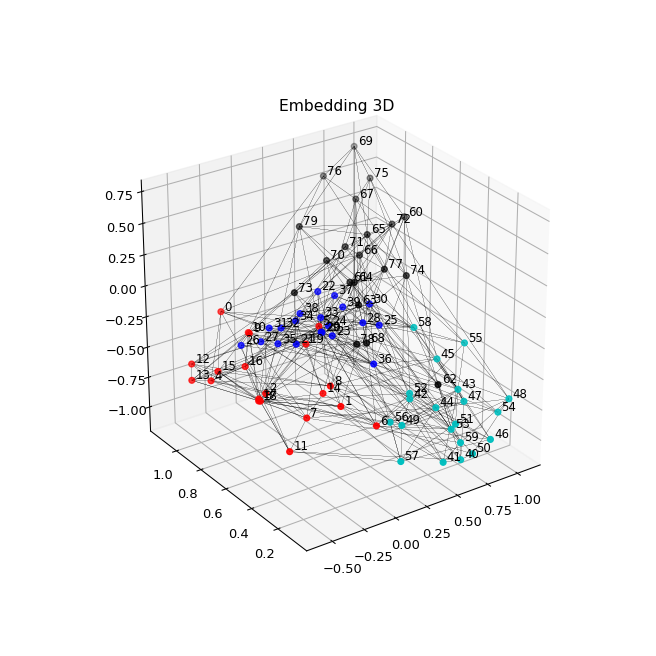

In [37]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw20.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

Embedding with number walks 25

<IPython.core.display.Javascript object>


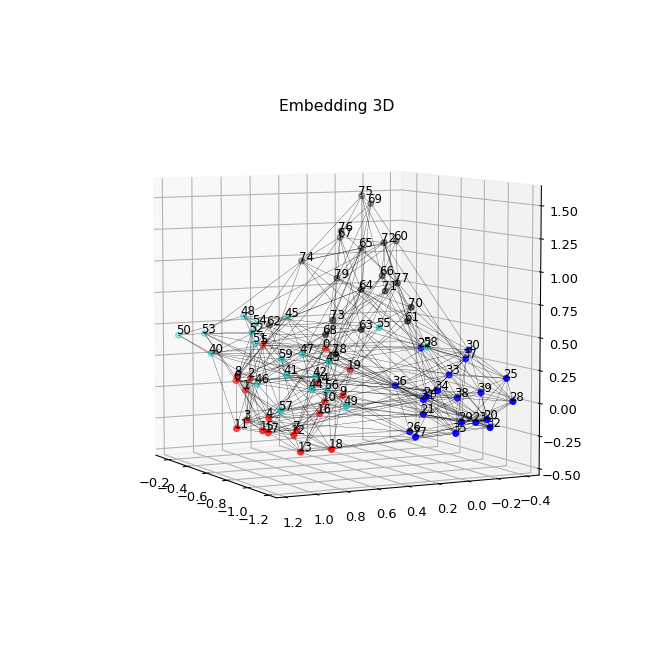

In [57]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw25.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

<IPython.core.display.Javascript object>


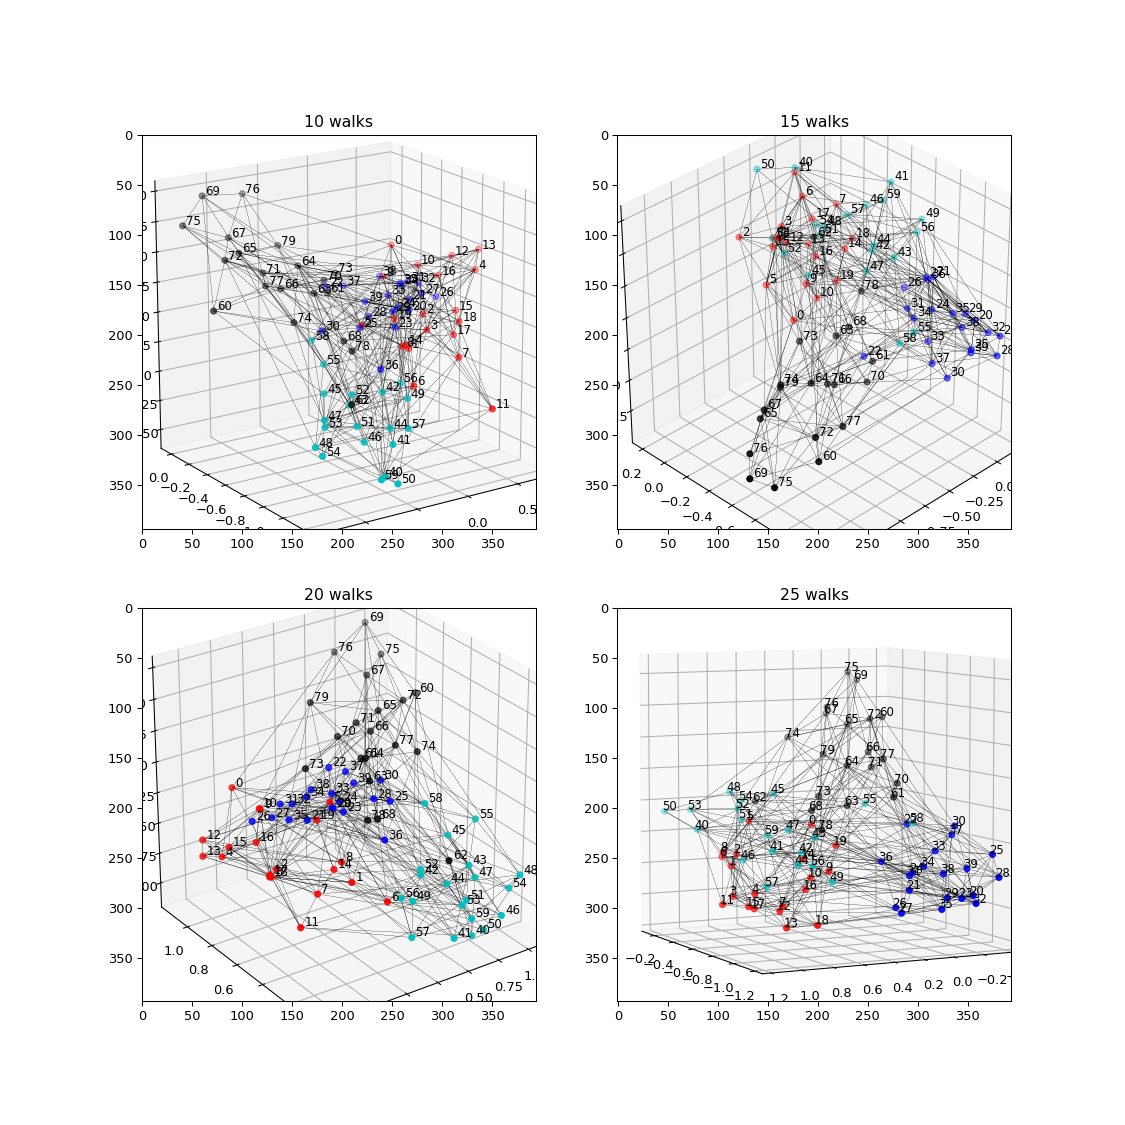

In [58]:
import cv2

im1 = cv2.imread('res/emb_w10.png')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# crop 20% of image
i = int(len(im1)/5)
j = len(im1)-i

crop_img1 = im1[i:j, i:j]


im2 = cv2.imread('res/emb_w15.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
crop_img2 = im2[i:j, i:j]

im3 = cv2.imread('res/emb_w20.png')
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
crop_img3 = im3[i:j, i:j]

im4 = cv2.imread('res/emb_w25.png')
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
crop_img4 = im4[i:j, i:j]

plt.rcParams["figure.figsize"] = (12,12)
f, axarr = plt.subplots(2,2)
axarr[0][0].imshow(crop_img1)
axarr[0][1].imshow(crop_img2)
axarr[1][0].imshow(crop_img3)
axarr[1][1].imshow(crop_img4)
axarr[0][0].title.set_text('10 walks')
axarr[0][1].title.set_text('15 walks')
axarr[1][0].title.set_text('20 walks')
axarr[1][1].title.set_text('25 walks')
plt.show()

  Number of walks: 20
  
  Walk length: 30

<IPython.core.display.Javascript object>


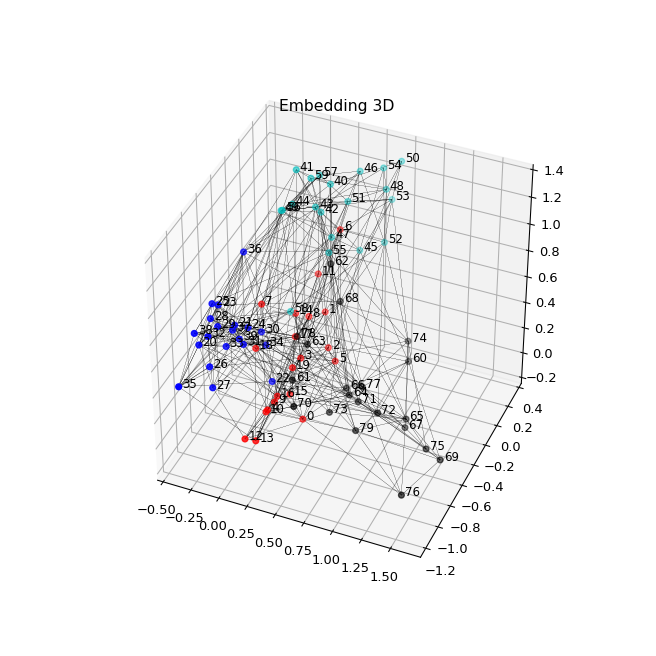

In [60]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw20_wl30.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

Number of walks: 20

Walk length: 20

<IPython.core.display.Javascript object>


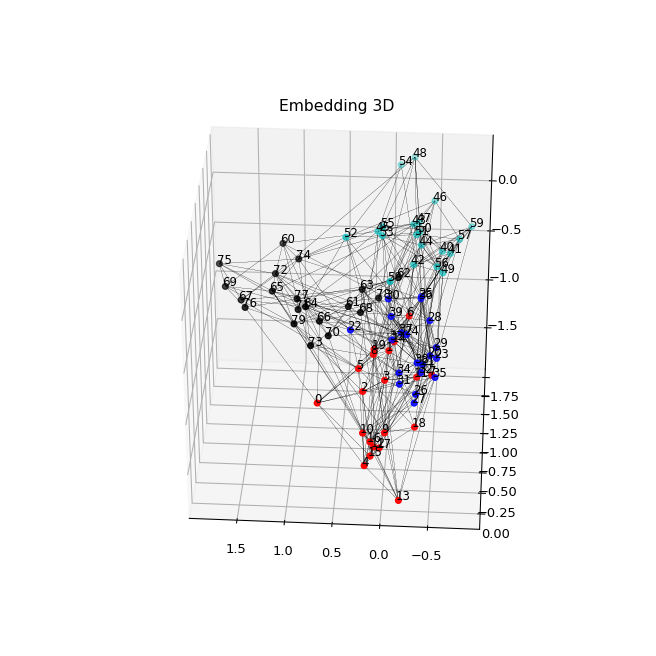

In [61]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw20_wl20.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

Number of walks: 20

Walk length: 10

<IPython.core.display.Javascript object>


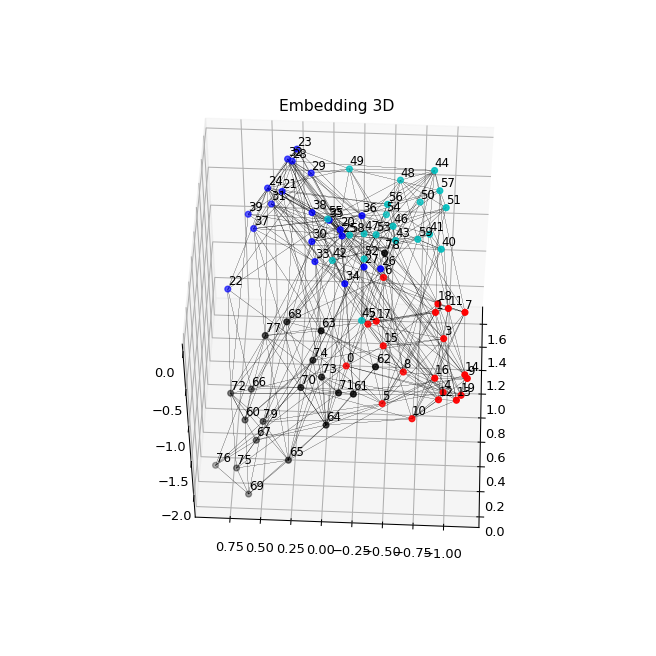

In [62]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw20_wl10.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)

<IPython.core.display.Javascript object>


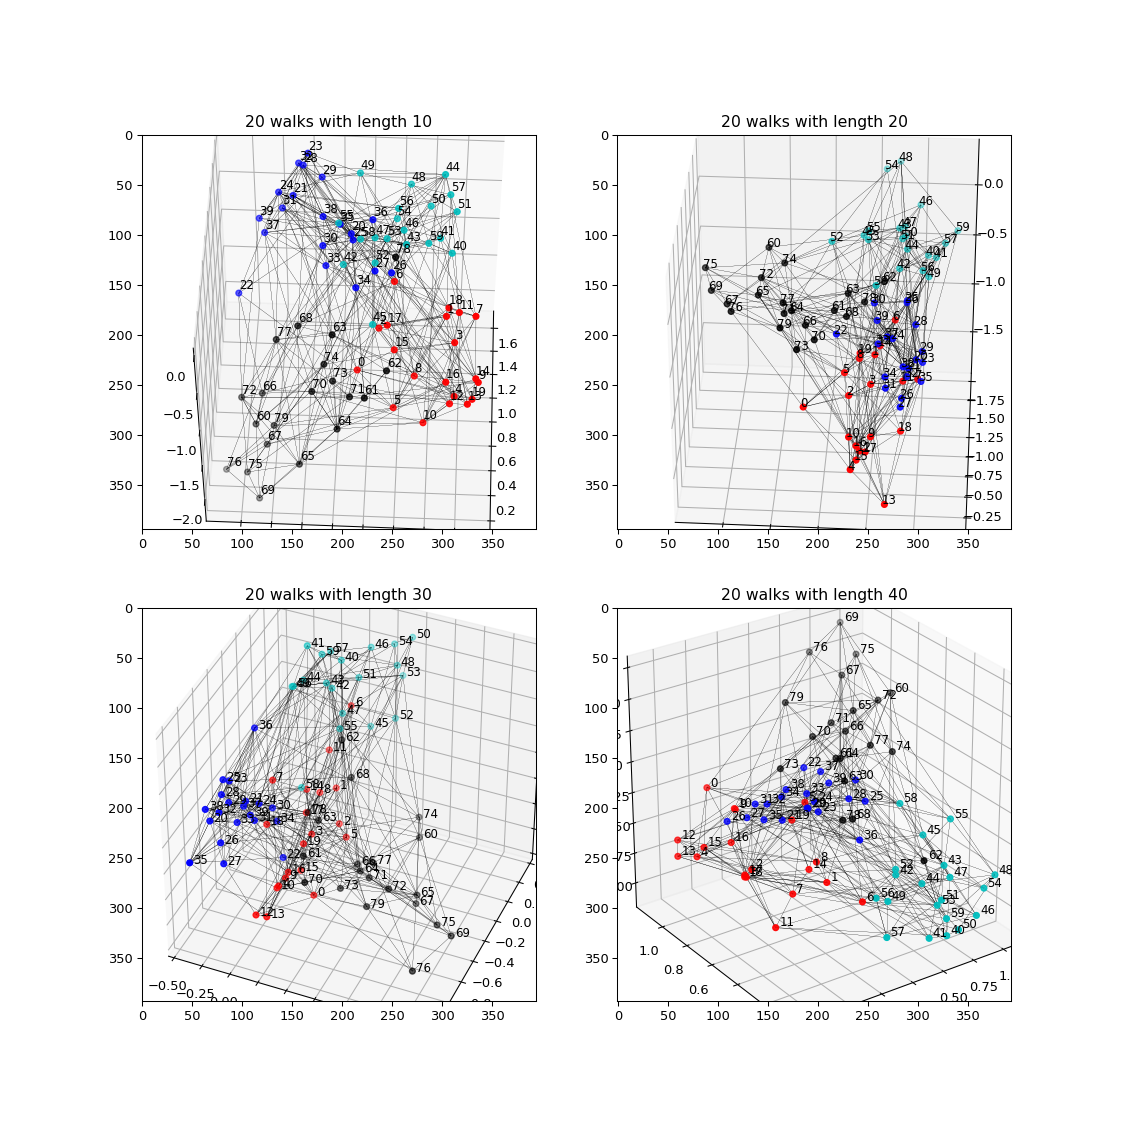

In [63]:
import cv2

im1 = cv2.imread('res/emb_w20_wl10.png')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# crop 20% of image
i = int(len(im1)/5)
j = len(im1)-i

crop_img1 = im1[i:j, i:j]


im2 = cv2.imread('res/emb_w20_wl20.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
crop_img2 = im2[i:j, i:j]

im3 = cv2.imread('res/emb_w20_wl30.png')
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
crop_img3 = im3[i:j, i:j]

im4 = cv2.imread('res/emb_w20.png')
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
crop_img4 = im4[i:j, i:j]

plt.rcParams["figure.figsize"] = (12,12)
f, axarr = plt.subplots(2,2)
axarr[0][0].imshow(crop_img1)
axarr[0][1].imshow(crop_img2)
axarr[1][0].imshow(crop_img3)
axarr[1][1].imshow(crop_img4)
axarr[0][0].title.set_text('20 walks with length 10')
axarr[0][1].title.set_text('20 walks with length 20')
axarr[1][0].title.set_text('20 walks with length 30')
axarr[1][1].title.set_text('20 walks with length 40')
plt.show()

Lets try 20 walks with length 2

<IPython.core.display.Javascript object>


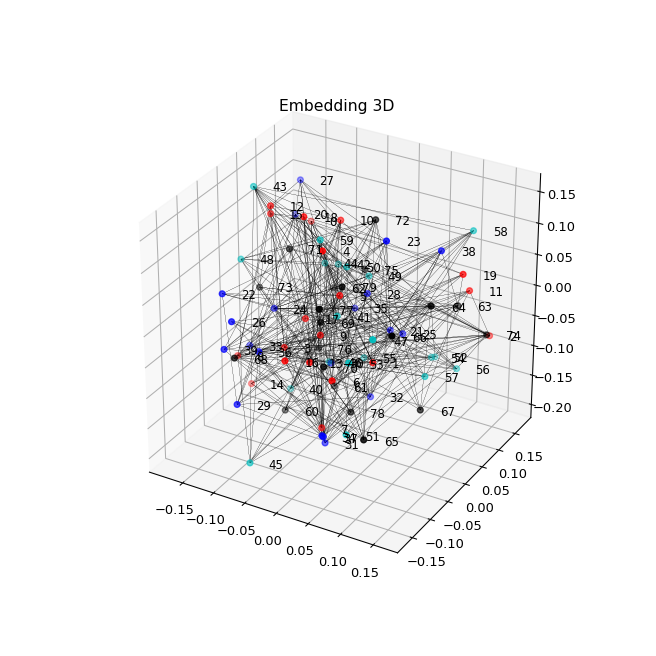

In [64]:
graph_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/graph30in_5out.adjlist'
embedding_f= 'C:/Users/Hp/Downloads/deepwalk/graph30in_5out_3d_nw20_wl2.embeddings'


plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=graph_f, embedding=embedding_f ,node_color = color_map, title='Embedding 3D',linewidth=0.1)